# Question 3: Outlier Detection

CS 5304 - Data Science in the Wild, Assignment 2

**Author**: Yufan Zhang (yz2894)


In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
# Load the data
df = pd.read_csv('data/prog_book.csv')

# Convert 'Reviews' from object to numeric
df['Reviews'] = df['Reviews'].str.replace(',', '')
df['Reviews'] = df['Reviews'].astype(int)

df

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294


## Task 1: Univariate Outlier detection

In [30]:
features = ["Rating", "Reviews", "Number_Of_Pages", "Price"]

# Generate box plots for each feature
fig = make_subplots(rows=1, cols=4)

for feature in features:
    fig.add_trace(
        go.Box(y=df[feature], name=feature),
        row=1,
        col=features.index(feature) + 1,
    )

fig.update_layout(height=600, width=1000, title_text="Box Plots for Each Feature")
fig.show()

## Task 2: Multivariate Outlier detection

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
# Encoding 'Type' column and preparing the dataset
df_encoded = df.copy()
df_encoded['Type'] = LabelEncoder().fit_transform(df['Type'])

df_encoded

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,1,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,1,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,2,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,1,12.873529
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,2,13.164706
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,1,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,3,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,0,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,1,220.385294


In [38]:
# Selecting the relevant features
features = ['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type']
X = df_encoded[features]

X

,Price,Number_Of_Pages,Rating,Reviews,Type
0,9.323529,105,4.17,3829,1
1,11.000000,527,4.01,1406,1
2,11.267647,50,3.33,0,2
3,12.873529,393,3.97,1658,1
4,13.164706,305,4.06,1325,2
...,...,...,...,...,...
266,203.108823,752,3.76,0,1
267,212.097059,1040,3.94,22,3
268,220.385294,896,4.49,36,0
269,220.385294,3168,4.77,4,1


In [40]:
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Bivariate analysis
bivariate_combinations = list(combinations(features, 2))

bivariate_combinations

[('Price', 'Number_Of_Pages'),
 ('Price', 'Rating'),
 ('Price', 'Reviews'),
 ('Price', 'Type'),
 ('Number_Of_Pages', 'Rating'),
 ('Number_Of_Pages', 'Reviews'),
 ('Number_Of_Pages', 'Type'),
 ('Rating', 'Reviews'),
 ('Rating', 'Type'),
 ('Reviews', 'Type')]

In [42]:
X_scaled_df

,Price,Number_Of_Pages,Rating,Reviews,Type
0,-1.268555,-1.211057,0.353476,6.611187,-1.245116
1,-1.221524,0.169913,-0.197845,2.214547,-1.245116
2,-1.214015,-1.391042,-2.540962,-0.336702,-0.294619
3,-1.168964,-0.268594,-0.335676,2.671812,-1.245116
4,-1.160795,-0.556569,-0.025557,2.067569,-0.294619
...,...,...,...,...,...
266,4.167898,0.906213,-1.059285,-0.336702,-1.245116
267,4.420054,1.848677,-0.439048,-0.296782,0.655878
268,4.652572,1.377445,1.456120,-0.271378,-2.195613
269,4.652572,8.812435,2.420933,-0.329444,-1.245116


In [77]:
# For plotting and outlier identification
outliers_bivariate = {}

# Plotting setup
fig = make_subplots(
    rows=5,
    cols=2,
    subplot_titles=[f"{x[0]} vs {x[1]}" for x in bivariate_combinations],
    vertical_spacing=0.05,
)

for i, (feature1, feature2) in enumerate(bivariate_combinations):
    # Apply DBSCAN
    X_subset = X_scaled_df[[feature1, feature2]]
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_subset)
    labels = dbscan.labels_

    # Plot
    fig.add_trace(
        go.Scatter(
            x=X_subset[feature1],
            y=X_subset[feature2],
            mode="markers",
            marker=dict(color=labels, colorscale="Viridis", showscale=True),
            text=labels,
            showlegend=False,
        ),
        row=i // 2 + 1,
        col=i % 2 + 1,
    )
    fig.update_xaxes(title_text=feature1, row=i // 2 + 1, col=i % 2 + 1)
    fig.update_yaxes(title_text=feature2, row=i // 2 + 1, col=i % 2 + 1)


fig.update_layout(
    height=2000, width=1200, title_text="Bivariate Analysis"
)
fig.update_traces(marker_showscale=False)

fig.show()

In [78]:
# # For plotting and outlier identification
# outliers_bivariate = {}

# # Plotting setup
# fig, axs = plt.subplots(len(bivariate_combinations)//2, 2, figsize=(15, 4 * len(bivariate_combinations)//2))
# axs = axs.flatten()

# for i, (feature1, feature2) in enumerate(bivariate_combinations):
#     # Apply DBSCAN
#     X_subset = X_scaled_df[[feature1, feature2]]
#     dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_subset)
#     labels = dbscan.labels_

#     # Identify outliers
#     outlier_indices = np.where(labels == -1)[0]
#     outliers_bivariate[(feature1, feature2)] = df.iloc[outlier_indices][[feature1, feature2]]

#     # Plot
#     axs[i].scatter(X_subset[feature1], X_subset[feature2], c=labels, cmap="Paired", marker='o')
#     axs[i].set_title(f'{feature1} vs {feature2}')
#     axs[i].set_xlabel(feature1)
#     axs[i].set_ylabel(feature2)

# plt.tight_layout()
# plt.show()

# # Show the outliers for one of the bivariate combinations as an example
# example_outliers = next(iter(outliers_bivariate.values()))
# example_outliers

In [87]:
import plotly.graph_objects as go
from itertools import combinations
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'features' is a list of your features and 'X_scaled_df' and 'df' are your datasets
trivariate_combinations = list(combinations(features, 3))

# For plotting and outlier identification
outliers_trivariate = {}

# Plotting setup
fig = make_subplots(
    rows=10,
    cols=1,
    subplot_titles=[f"{x[0]} vs {x[1]} vs {x[2]}" for x in trivariate_combinations],
    vertical_spacing=0.05,
)

# Loop through each combination of features
for combination in trivariate_combinations:
    feature1, feature2, feature3 = combination
    X_subset = X_scaled_df[[feature1, feature2, feature3]]

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_subset)
    labels = dbscan.labels_

    # Identify outliers
    outlier_indices = np.where(labels == -1)[0]
    outliers_trivariate[combination] = df.iloc[outlier_indices][list(combination)]

    # Create a 3D scatter plot
    fig = go.Figure(
        data=[
            go.Scatter3d(
                x=X_subset[feature1],
                y=X_subset[feature2],
                z=X_subset[feature3],
                mode="markers",
                marker=dict(
                    size=5,
                    color=labels,  # color points by cluster labels
                    colorscale="Viridis",  # choose a color scale
                    opacity=0.8,
                ),
            )
        ]
    )

    # Set titles and labels
    fig.update_layout(
        title=f"{feature1}, {feature2} vs {feature3}",
        height=600,
        width=600,
        scene=dict(xaxis_title=feature1, yaxis_title=feature2, zaxis_title=feature3),
    )

    # Show the plot
    fig.show()

# Optionally, show the outliers for one of the trivariate combinations as an example
example_outliers_trivariate = next(iter(outliers_trivariate.values()))
print(example_outliers_trivariate)

          Price  Number_Of_Pages  Rating
2     11.267647               50    3.33
9     14.641176              128    4.62
24    19.152941              318    3.20
54    25.855882              317    5.00
60    27.850000              442    3.32
86    36.617647             1200    3.22
94    38.235294              462    3.38
119   42.614706              914    4.29
125   44.426471              554    4.50
129   45.326471             1008    3.96
131   45.561765              616    4.72
132   45.664706              286    3.37
134   46.000000              828    4.03
137   46.358824             1506    4.62
147   50.511765              570    3.58
155   51.473529              851    3.83
177   59.082353              464    3.00
182   60.391176              460    3.00
184   60.682353              487    3.52
187   61.167647              192    3.00
193   63.835294              528    3.70
194   64.091176              792    4.67
198   66.320588              863    4.58
201   66.832353 

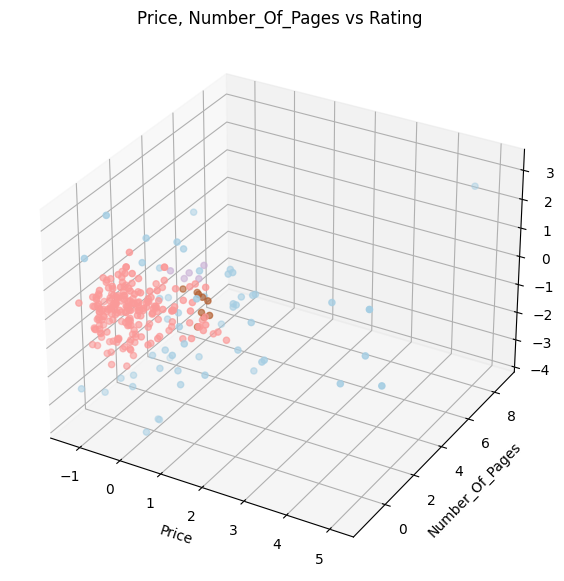

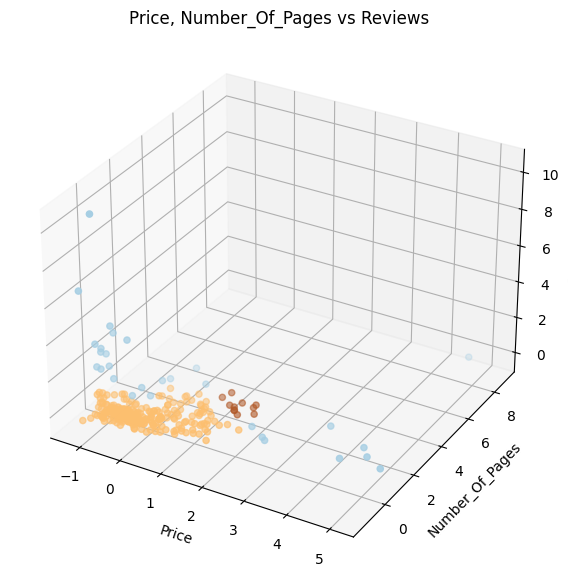

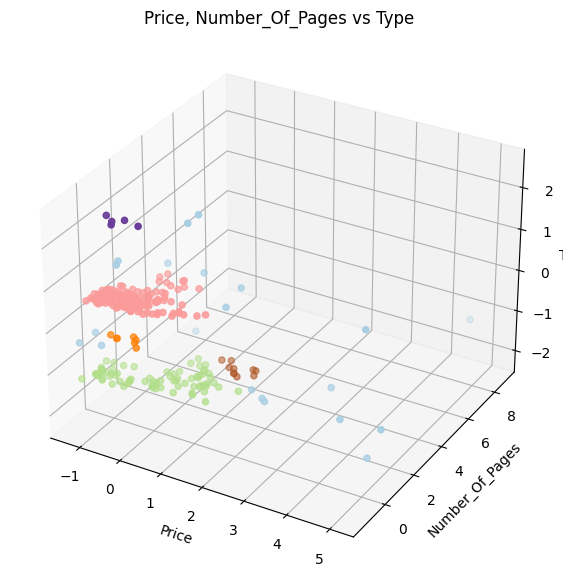

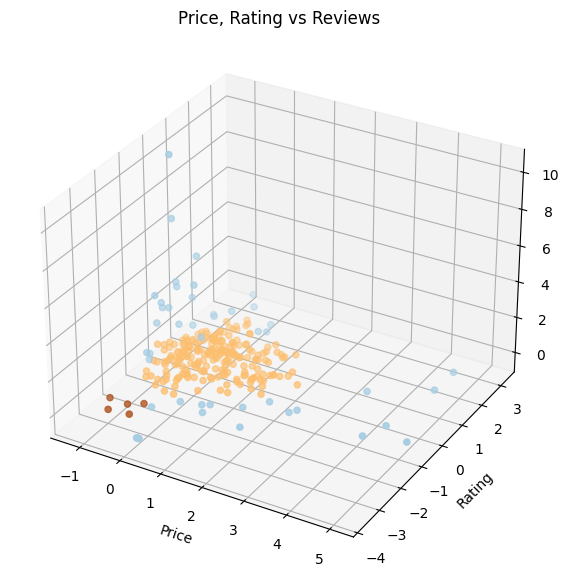

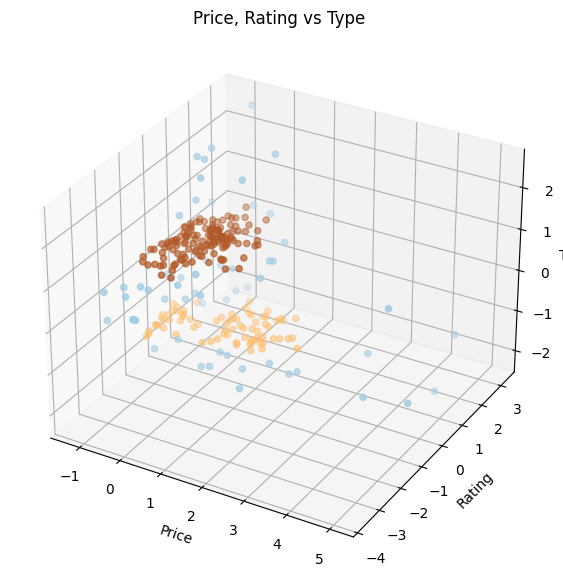

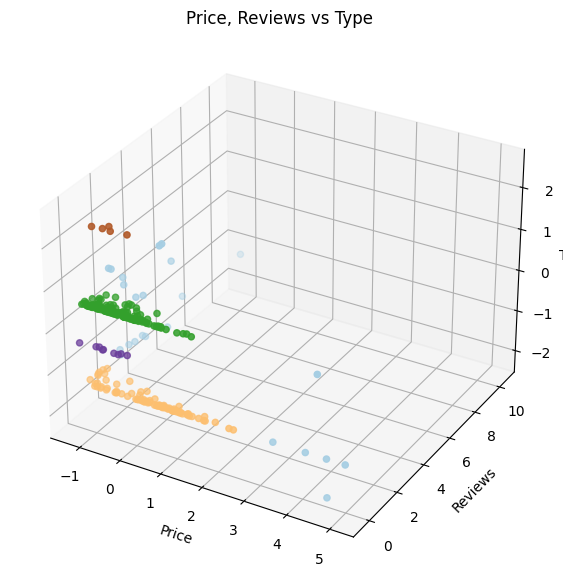

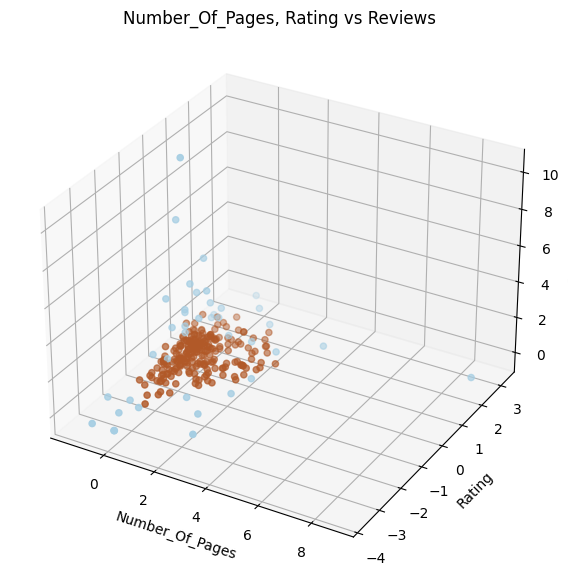

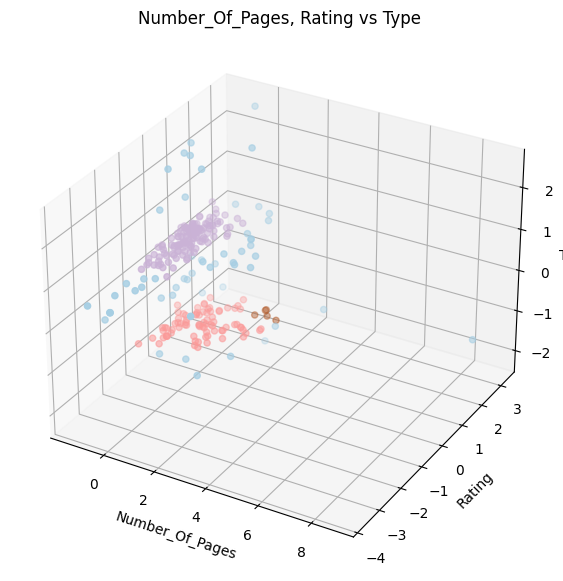

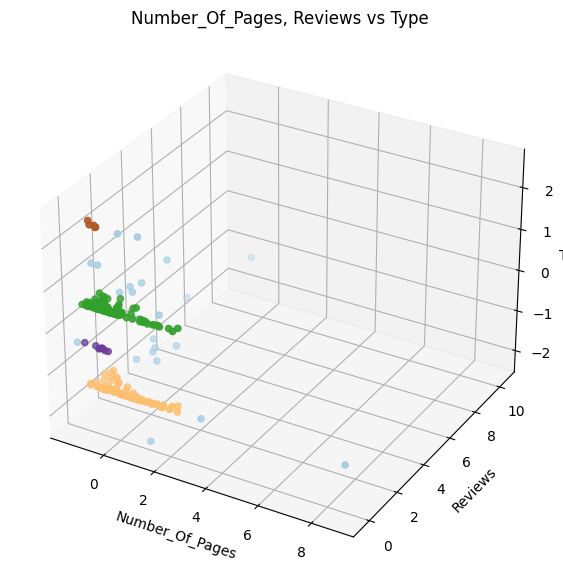

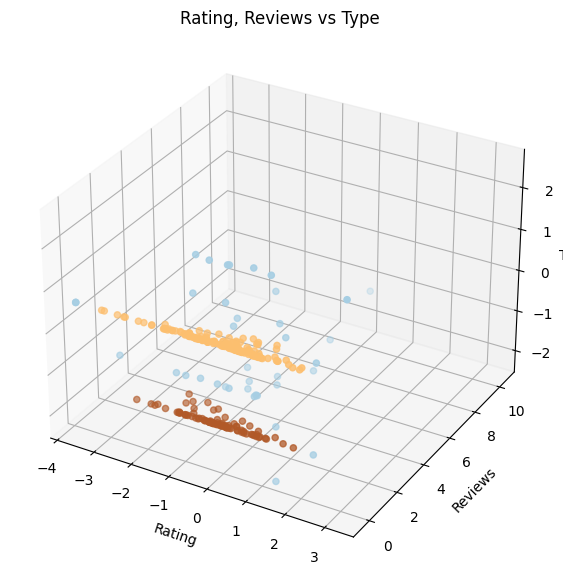

,Price,Number_Of_Pages,Rating
2,11.267647,50,3.33
9,14.641176,128,4.62
24,19.152941,318,3.20
54,25.855882,317,5.00
60,27.850000,442,3.32
86,36.617647,1200,3.22
94,38.235294,462,3.38
119,42.614706,914,4.29
125,44.426471,554,4.50
129,45.326471,1008,3.96


In [43]:
# Trivariate analysis
trivariate_combinations = list(combinations(features, 3))

# For plotting and outlier identification
outliers_trivariate = {}

# Since we are plotting in 3D, we'll create a new figure for each combination
for combination in trivariate_combinations:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    feature1, feature2, feature3 = combination
    X_subset = X_scaled_df[[feature1, feature2, feature3]]
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_subset)
    labels = dbscan.labels_

    # Identify outliers
    outlier_indices = np.where(labels == -1)[0]
    outliers_trivariate[combination] = df.iloc[outlier_indices][list(combination)]

    ax.scatter(X_subset[feature1], X_subset[feature2], X_subset[feature3], c=labels, cmap="Paired", marker='o')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    ax.set_title(f'{feature1}, {feature2} vs {feature3}')

plt.show()

# Show the outliers for one of the trivariate combinations as an example
example_outliers_trivariate = next(iter(outliers_trivariate.values()))
example_outliers_trivariate
